In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf

In [2]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [3]:
from backdata import tickers, start_year, start_month, start_day, end_year, end_month, end_day

start_date = str(start_year) + '-' + str(start_month) + '-' + str(start_day)
end_date = str(end_year) + '-' + str(end_month) + '-' + str(end_day)

In [4]:
tickers = tickers

In [5]:
ohlc = yf.download(tickers, start = start_date)
prices = ohlc["Adj Close"].dropna(how="all")

[*********************100%***********************]  7 of 7 completed


In [6]:
df = prices[prices.index >= start_date]
df

,AAPL,AMT,AMZN,CMG,EQIX,MSFT,UNH
Date,,,,,,,
2012-01-03,12.540046,48.573860,8.951500,341.269989,80.479607,21.527197,43.644592
2012-01-04,12.607439,49.275921,8.875500,348.750000,80.209358,22.033806,44.280327
2012-01-05,12.747403,49.845814,8.880500,350.480011,83.269875,22.258978,44.576977
2012-01-06,12.880666,49.763245,9.130500,348.950012,83.404984,22.604759,44.738033
2012-01-09,12.860233,49.903645,8.928000,339.739990,85.654694,22.307226,44.687180
...,...,...,...,...,...,...,...
2022-09-12,163.429993,265.089996,136.449997,1747.939941,665.469971,266.649994,531.250000
2022-09-13,153.839996,254.630005,126.820000,1701.060059,636.270020,251.990005,513.960022
2022-09-14,155.309998,251.820007,128.550003,1721.489990,626.679993,252.220001,509.769989


In [7]:
daily_ret = df.pct_change()  # 종목 수정 종가데이터의 일별주가상승률
annual_ret = daily_ret.mean() * 252 # 연평균 주가상승률
daily_cov = daily_ret.cov() # 일별주가상승률의 공분산행렬
annual_cov = daily_cov * 252 # 공분산행렬과 영업일 수의 곱

port_ret = [] # 포트폴리오의 일별주가상승률
port_risk = [] # 리스크
port_weights = [] # 비중
sharpe_ratio = []

In [8]:
for _ in tqdm(range(1000000)): # 임의로 만들 포트폴리오
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights) # 임의의 가중치를 랜덤으로 부여

    returns = np.dot(weights, annual_ret) # 가중치와 연 수익률 행렬과 내적을 실시
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) # 포트폴리오의 변동성의 기댓값을 산출

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

100%|██████████| 1000000/1000000 [00:35<00:00, 27985.32it/s]


In [9]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(tqdm(tickers)):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in tickers]]
df

100%|██████████| 7/7 [00:01<00:00,  5.93it/s]


,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,UNH
0,0.228843,0.195119,1.172834,0.025032,0.283379,0.017499,0.105516,0.152699,0.349244,0.066630
1,0.249539,0.194003,1.286265,0.150939,0.171007,0.058065,0.034213,0.021474,0.240485,0.323818
2,0.237503,0.194216,1.222884,0.081858,0.206953,0.133522,0.088861,0.252112,0.161221,0.075474
3,0.261765,0.204664,1.278997,0.243734,0.022267,0.156763,0.006311,0.197962,0.195205,0.177757
4,0.243965,0.199980,1.219947,0.134987,0.168070,0.200579,0.054872,0.295288,0.088962,0.057242
...,...,...,...,...,...,...,...,...,...,...
999995,0.238299,0.191297,1.245701,0.023255,0.183923,0.169781,0.130497,0.247802,0.020521,0.224220
999996,0.253378,0.205338,1.233955,0.210773,0.010712,0.127886,0.208719,0.130839,0.178862,0.132208
999997,0.234010,0.194979,1.200177,0.049652,0.155216,0.066374,0.209757,0.225064,0.176890,0.117047
999998,0.253023,0.202058,1.252230,0.227447,0.082889,0.185229,0.086279,0.208276,0.129722,0.080159


In [10]:
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # Low Risk
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # Max Sharpe

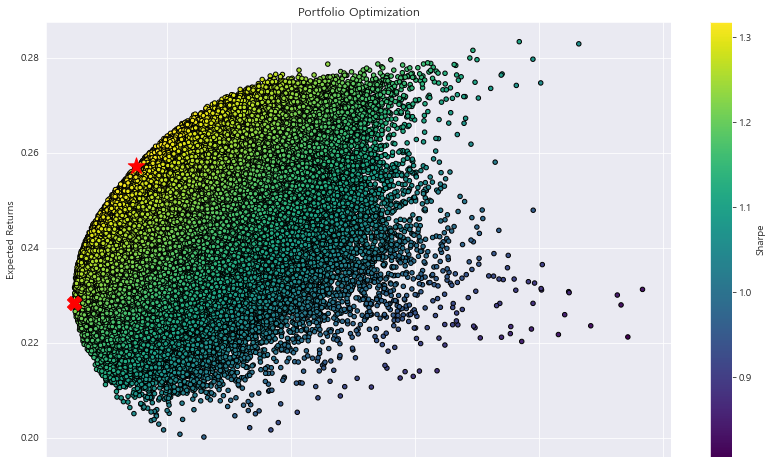

In [11]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
                edgecolors='k', grid=True)
# 샤프지수가 가장 큰 포트폴리오
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r',
            marker='*', s=300)
# 리스크가 제일 작은 포트폴리오
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r',
            marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [12]:
min_risk

,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,UNH
405882,0.228372,0.185151,1.233439,0.10362,0.3436,0.064123,0.116115,0.089123,0.033587,0.249832


In [13]:
max_sharpe

,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,UNH
133339,0.257128,0.195049,1.318279,0.125429,0.079335,0.165922,0.041455,0.117939,0.101247,0.368672


In [14]:
stock_weight_dict = dict(zip(list(max_sharpe[tickers].columns),
                             max_sharpe[tickers].values.flatten().tolist()))
stock_weight_dict

{'AAPL': 0.12542932721904673,
 'AMT': 0.07933515939375084,
 'AMZN': 0.16592235190469232,
 'CMG': 0.04145538474672352,
 'EQIX': 0.11793880135473887,
 'MSFT': 0.10124743402576314,
 'UNH': 0.3686715413552845}

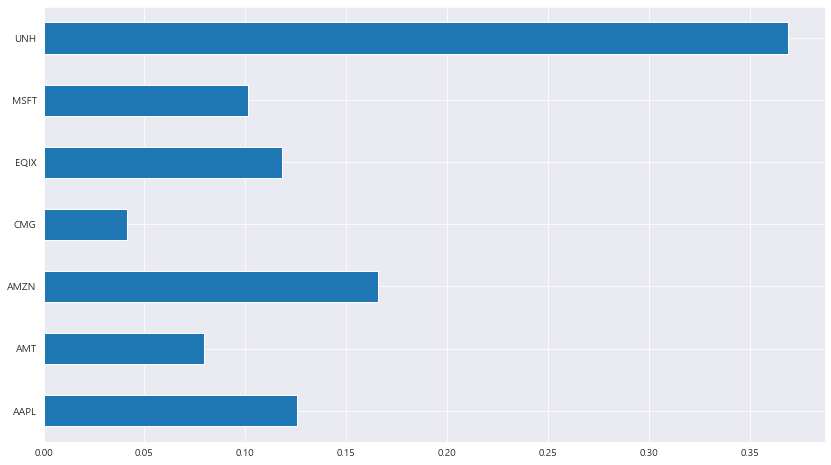

In [15]:
from collections import OrderedDict

weights = OrderedDict(stock_weight_dict)
pd.Series(weights).plot.barh();

In [16]:
def print_orderdict(dict, postfix='%', space=8, title='', line=1):
    print(title)
    idx = 0
    for i in dict:
        idx += 1
        if postfix=='%':
            num = str(round(dict[i]*100, 2))
        else:
            num = str(dict[i])
        print(i.ljust(6), (num+postfix).rjust(space), end="")
        if idx % line == 0:
            print()

In [17]:
# TODO: 투자금 입력
deposit = 8000

In [19]:
from pypfopt.discrete_allocation import DiscreteAllocation

latest_prices = prices.iloc[-1] # 마지막 종가 기준

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=deposit)
allocation, leftover = da.greedy_portfolio()

buy = 0
for k  in allocation:
    buy += latest_prices[k] * allocation[k]

print("Total Asset($): ", deposit)
print("Total buy($): ", round(buy, 2), ", leftover($):", round(deposit - buy, 2))
print_orderdict(allocation,
                postfix=" stk",
                title="** Optimal Weights **")

Total Asset($):  8000
Total buy($):  7987.01 , leftover($): 12.99
** Optimal Weights **
UNH       6 stk
AMZN     10 stk
AAPL      6 stk
EQIX      2 stk
MSFT      3 stk
AMT       3 stk
